Import Libraries

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import textstat

Import the data

In [3]:
data = pd.read_csv('combined_dataset.csv')
data

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,num_words_in_transcript
0,uppaup1,alice smith,software engineer,here ' s a simulated interview for a software ...,here ' s a sample resume for alice smith : * *...,reject,unsatisfactory references or background check .,here is a comprehensive job description for a ...,586
1,uppaup2,hank brown,software engineer,here ' s a simulated interview for a software ...,"here ' s a resume for hank brown , a selected ...",select,growth mindset and adaptability .,here is a job description for a software engin...,853
2,uppaup3,bob jones,data scientist,here ' s a simulated interview for a data scie...,"here ' s a sample resume for bob jones , who a...",reject,inadequate communication or interpersonal skil...,here is a comprehensive job description for a ...,534
3,uppaup4,bob miller,software engineer,here ' s a simulated interview for a software ...,"here ' s a sample resume for bob miller , a so...",select,strong cultural fit .,here is a sample job description for a softwar...,715
4,uppaup5,ivy jones,data engineer,here ' s a simulated interview for a data engi...,here ' s a sample resume for ivy jones : * * i...,reject,lack of relevant skills or experience .,here is a sample job description for a data en...,620
...,...,...,...,...,...,...,...,...,...
3169,ananba44,ananya bansal,data engineer,here ' s a realistic interview transcript for ...,ananya bansal contact information : * phone : ...,select,experience gap,we are seeking a qualified data engineer with ...,786
3170,diyasi576,diya singh,product manager,interview transcript for product manager role ...,diya singh contact information : * email : [ d...,reject,business acumen,we are seeking a qualified product manager wit...,735
3171,harska507,harshitha kapoor,ui engineer,"interviewer : hi harshitha , thanks for coming...",harshitha kapoor ui engineer contact informati...,select,cultural fit,we are seeking a qualified ui engineer with de...,913
3172,kabich225,kabir chopra,software engineer,here ' s a realistic interview transcript for ...,kabir chopra contact information : * email : [...,reject,technical knowledge,we are seeking a qualified software engineer w...,806


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       3174 non-null   object
 1   Name                     3174 non-null   object
 2   Role                     3174 non-null   object
 3   Transcript               3174 non-null   object
 4   Resume                   3174 non-null   object
 5   decision                 3174 non-null   object
 6   Reason for decision      3174 non-null   object
 7   Job Description          3174 non-null   object
 8   num_words_in_transcript  3174 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 223.3+ KB


,num_words_in_transcript
count,3174.000000
mean,699.766856
std,138.352773
min,64.000000
25%,598.250000
50%,699.000000
75%,796.000000
max,1254.000000


In [5]:
# Checking for missing values
data.isnull().sum()

ID                         0
Name                       0
Role                       0
Transcript                 0
Resume                     0
decision                   0
Reason for decision        0
Job Description            0
num_words_in_transcript    0
dtype: int64

In [6]:
# Calculate resume and job description similarity (Cosine Similarity)
vectorizer = TfidfVectorizer()
resume_jd_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    jd = data['Job Description'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, jd]))[0, 1]
    resume_jd_similarity.append(similarity)
data['resume_jd_similarity'] = resume_jd_similarity

In [7]:
# Calculate resume and transcript similarity (Cosine Similarity)
resume_transcript_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    transcript = data['Transcript'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, transcript]))[0, 1]
    resume_transcript_similarity.append(similarity)
data['resume_transcript_similarity'] = resume_transcript_similarity

In [8]:
data

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,num_words_in_transcript,resume_jd_similarity,resume_transcript_similarity
0,uppaup1,alice smith,software engineer,here ' s a simulated interview for a software ...,here ' s a sample resume for alice smith : * *...,reject,unsatisfactory references or background check .,here is a comprehensive job description for a ...,586,0.553317,0.365774
1,uppaup2,hank brown,software engineer,here ' s a simulated interview for a software ...,"here ' s a resume for hank brown , a selected ...",select,growth mindset and adaptability .,here is a job description for a software engin...,853,0.345283,0.499810
2,uppaup3,bob jones,data scientist,here ' s a simulated interview for a data scie...,"here ' s a sample resume for bob jones , who a...",reject,inadequate communication or interpersonal skil...,here is a comprehensive job description for a ...,534,0.666840,0.512985
3,uppaup4,bob miller,software engineer,here ' s a simulated interview for a software ...,"here ' s a sample resume for bob miller , a so...",select,strong cultural fit .,here is a sample job description for a softwar...,715,0.533122,0.456622
4,uppaup5,ivy jones,data engineer,here ' s a simulated interview for a data engi...,here ' s a sample resume for ivy jones : * * i...,reject,lack of relevant skills or experience .,here is a sample job description for a data en...,620,0.597536,0.394706
...,...,...,...,...,...,...,...,...,...,...,...
3169,ananba44,ananya bansal,data engineer,here ' s a realistic interview transcript for ...,ananya bansal contact information : * phone : ...,select,experience gap,we are seeking a qualified data engineer with ...,786,0.337360,0.497553
3170,diyasi576,diya singh,product manager,interview transcript for product manager role ...,diya singh contact information : * email : [ d...,reject,business acumen,we are seeking a qualified product manager wit...,735,0.324334,0.533692
3171,harska507,harshitha kapoor,ui engineer,"interviewer : hi harshitha , thanks for coming...",harshitha kapoor ui engineer contact informati...,select,cultural fit,we are seeking a qualified ui engineer with de...,913,0.351762,0.361235
3172,kabich225,kabir chopra,software engineer,here ' s a realistic interview transcript for ...,kabir chopra contact information : * email : [...,reject,technical knowledge,we are seeking a qualified software engineer w...,806,0.254393,0.411042


In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Lists to store sentiment results
sentiments = []
polarity = []

# Perform sentiment analysis on each transcript
for i in range(len(data)):
    transcript = data['Transcript'][i]
    sentiment_score = sia.polarity_scores(transcript)
    sentiments.append(sentiment_score['compound'])  # Compound sentiment score
    polarity.append('positive' if sentiment_score['compound'] > 0 
                    else 'negative' if sentiment_score['compound'] < 0 
                    else 'neutral')

# Add the results to the DataFrame
data['sentiment'] = sentiments
data['polarity'] = polarity

# Count of each sentiment category
polarity_counts = data['polarity'].value_counts()
print("\n2. Sentiment Polarity Distribution:")
for polarity, count in polarity_counts.items():
    print(f"   - {polarity.capitalize()}: {count} occurrences ({(count / len(data) * 100):.2f}%)")

# Overall average sentiment score
average_sentiment = data['sentiment'].mean()
print(f"\n3. Overall Average Sentiment Score: {average_sentiment:.2f}")
if average_sentiment > 0:
    print("   - The overall sentiment of the transcripts is positive.")
elif average_sentiment < 0:
    print("   - The overall sentiment of the transcripts is negative.")
else:
    print("   - The overall sentiment of the transcripts is neutral.")


2. Sentiment Polarity Distribution:
   - Positive: 3173 occurrences (99.97%)
   - Negative: 1 occurrences (0.03%)

3. Overall Average Sentiment Score: 1.00
   - The overall sentiment of the transcripts is positive.


In [10]:
# Function to calculate lexical diversity
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

# Compute lexical diversity for each transcript
data['lexical_diversity'] = data['Transcript'].apply(lexical_diversity)

# Calculate statistics
average_diversity = data['lexical_diversity'].mean()

In [11]:
# Length of transcript (number of words)
data['transcript_length'] = data['Transcript'].apply(lambda x: len(x.split()))

# Calculate statistics
average_length = data['transcript_length'].mean()
min_length = data['transcript_length'].min()
max_length = data['transcript_length'].max()

In [12]:
# Encoding the target variable (select/reject)
le = LabelEncoder()
data['decision'] = le.fit_transform(data['decision'])  # 0: reject, 1: select

In [13]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match'] = data.apply(lambda row: compute_similarity(row['Resume'], row['Job Description']), axis=1)

In [14]:
# Select features (X) and target variable (Y)
X = data[['resume_jd_similarity', 'resume_transcript_similarity', 'sentiment', 'transcript_length']]
y = data['decision']

In [15]:
#Soft Skills
from textblob import TextBlob

data['soft_skills_sentiment'] = data['Transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [16]:
# Resume length (number of words)
data['resume_length'] = data['Resume'].apply(lambda x: len(x.split()))

In [17]:
# Job Description Experience Match (Simple matching based on keywords, could be improved)
data['job_description_experience_match'] = data.apply(lambda row: len(set(row['Resume'].split()) & set(row['Job Description'].split())), axis=1)

In [18]:
#Cultural fit sentiment
data['cultural_fit_sentiment'] = data['Reason for decision'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [19]:
#job score
def job_fit_analysis(job_desc, transcript):
    # You can use similarity or keyword matching here
    job_keywords = job_desc.split()
    transcript_keywords = transcript.split()
    common_keywords = set(job_keywords).intersection(transcript_keywords)
    return len(common_keywords) / len(job_keywords)

data['job_fit_score'] = data.apply(lambda row: job_fit_analysis(row['Job Description'], row['Transcript']), axis=1)

In [20]:
#confidence score
data['confidence_score'] = data['Transcript'].apply(lambda x: x.count('I think') + x.count('Maybe'))

In [21]:
#job description complexity
data['job_desc_complexity'] = data['Job Description'].apply(lambda x: textstat.flesch_reading_ease(x))

In [22]:
#interaction quality
data['interaction_quality'] = data['num_words_in_transcript'] * data['sentiment']

In [23]:
data['clarity_score'] = data['Transcript'].apply(lambda x: textstat.flesch_reading_ease(x))

In [24]:
# Text complexity (resume and transcript - using a simple metric like Flesch Reading Ease)
def text_complexity(text):
    # Implement text complexity (e.g., Flesch Reading Ease)
    # Here's a placeholder function:
    return len(text.split()) / len(set(text.split()))  # A basic metric

data['text_complexity_transcript'] = data['Transcript'].apply(text_complexity)
data['text_complexity_resume'] = data['Resume'].apply(text_complexity)

In [25]:
data

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,num_words_in_transcript,resume_jd_similarity,...,resume_length,job_description_experience_match,cultural_fit_sentiment,job_fit_score,confidence_score,job_desc_complexity,interaction_quality,clarity_score,text_complexity_transcript,text_complexity_resume
0,uppaup1,alice smith,software engineer,here ' s a simulated interview for a software ...,here ' s a sample resume for alice smith : * *...,0,unsatisfactory references or background check .,here is a comprehensive job description for a ...,586,0.553317,...,584,100,0.000000,0.102703,0,-23.75,584.7694,76.52,3.431535,2.246154
1,uppaup2,hank brown,software engineer,here ' s a simulated interview for a software ...,"here ' s a resume for hank brown , a selected ...",1,growth mindset and adaptability .,here is a job description for a software engin...,853,0.345283,...,631,47,0.000000,0.223629,0,30.20,852.6588,53.00,3.270270,2.445736
2,uppaup3,bob jones,data scientist,here ' s a simulated interview for a data scie...,"here ' s a sample resume for bob jones , who a...",0,inadequate communication or interpersonal skil...,here is a comprehensive job description for a ...,534,0.666840,...,658,103,0.000000,0.099248,0,15.24,531.6504,75.50,2.843373,2.580392
3,uppaup4,bob miller,software engineer,here ' s a simulated interview for a software ...,"here ' s a sample resume for bob miller , a so...",1,strong cultural fit .,here is a sample job description for a softwar...,715,0.533122,...,604,90,0.311111,0.182410,0,-49.73,713.7845,65.12,3.334532,2.626087
4,uppaup5,ivy jones,data engineer,here ' s a simulated interview for a data engi...,here ' s a sample resume for ivy jones : * * i...,0,lack of relevant skills or experience .,here is a sample job description for a data en...,620,0.597536,...,688,87,0.400000,0.088398,0,-34.51,617.8920,64.61,3.456067,3.044248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,ananba44,ananya bansal,data engineer,here ' s a realistic interview transcript for ...,ananya bansal contact information : * phone : ...,1,experience gap,we are seeking a qualified data engineer with ...,786,0.337360,...,474,16,0.000000,0.500000,0,28.33,784.8996,65.73,3.262500,2.821429
3170,diyasi576,diya singh,product manager,interview transcript for product manager role ...,diya singh contact information : * email : [ d...,0,business acumen,we are seeking a qualified product manager wit...,735,0.324334,...,473,18,0.000000,0.568182,0,26.81,734.4120,53.21,2.845659,2.798817
3171,harska507,harshitha kapoor,ui engineer,"interviewer : hi harshitha , thanks for coming...",harshitha kapoor ui engineer contact informati...,1,cultural fit,we are seeking a qualified ui engineer with de...,913,0.351762,...,503,20,0.250000,0.533333,0,26.30,912.6348,64.61,3.032432,2.704301
3172,kabich225,kabir chopra,software engineer,here ' s a realistic interview transcript for ...,kabir chopra contact information : * email : [...,0,technical knowledge,we are seeking a qualified software engineer w...,806,0.254393,...,393,17,0.000000,0.536585,0,27.83,804.9522,55.64,3.000000,2.353293


In [26]:
data.to_csv('new_combined_data.csv')

In [2]:
data = pd.read_csv('new_combined_data.csv')

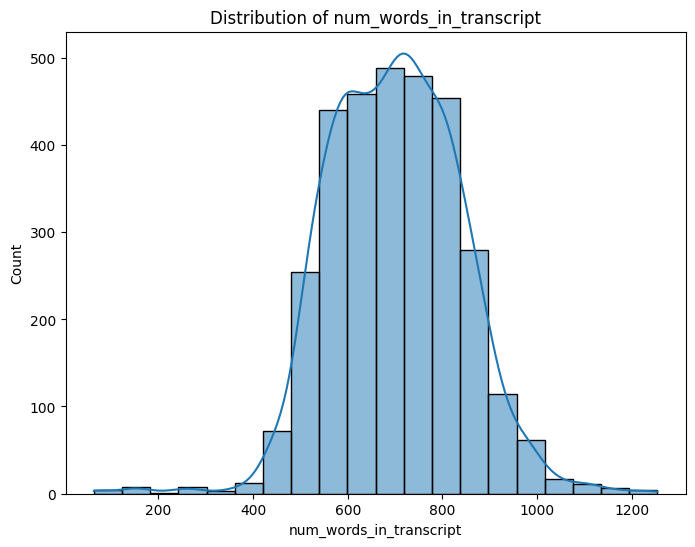

--- Summary of num_words_in_transcript Distribution ---
   - Mean: 699.77
   - Median: 699.00
   - Standard Deviation: 138.35
   - The distribution of num_words_in_transcript is positively skewed.
   - num_words_in_transcript appears to have a skewed distribution.
   ----------------------------------------------------



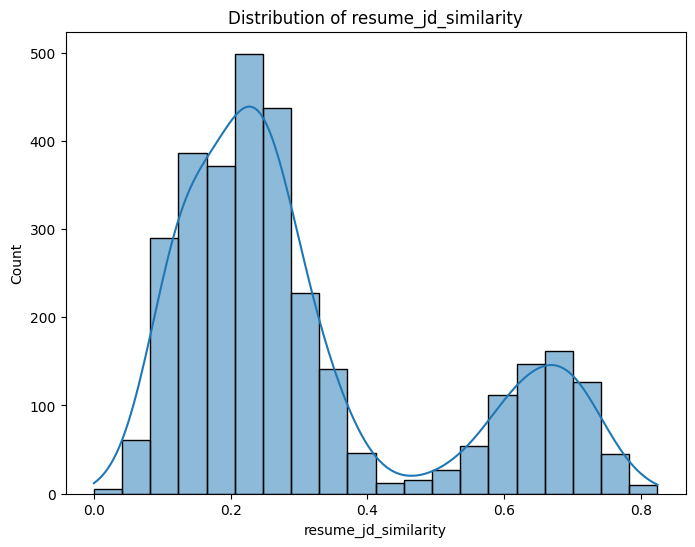

--- Summary of resume_jd_similarity Distribution ---
   - Mean: 0.31
   - Median: 0.24
   - Standard Deviation: 0.20
   - The distribution of resume_jd_similarity is positively skewed.
   - resume_jd_similarity appears to have a normal distribution.
   ----------------------------------------------------



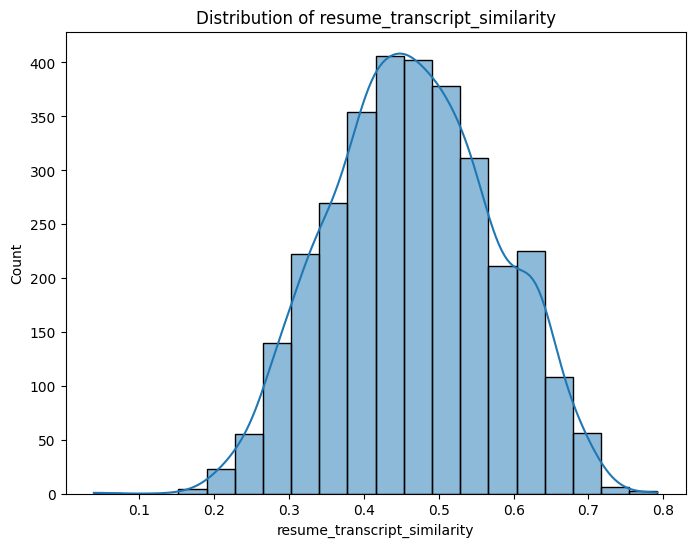

--- Summary of resume_transcript_similarity Distribution ---
   - Mean: 0.47
   - Median: 0.46
   - Standard Deviation: 0.11
   - The distribution of resume_transcript_similarity is positively skewed.
   - resume_transcript_similarity appears to have a normal distribution.
   ----------------------------------------------------



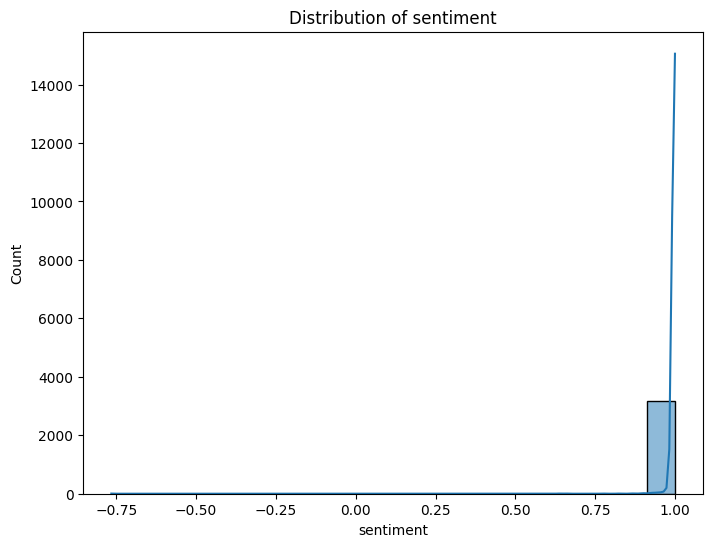

--- Summary of sentiment Distribution ---
   - Mean: 1.00
   - Median: 1.00
   - Standard Deviation: 0.03
   - The distribution of sentiment is negatively skewed.
   - sentiment appears to have a normal distribution.
   ----------------------------------------------------



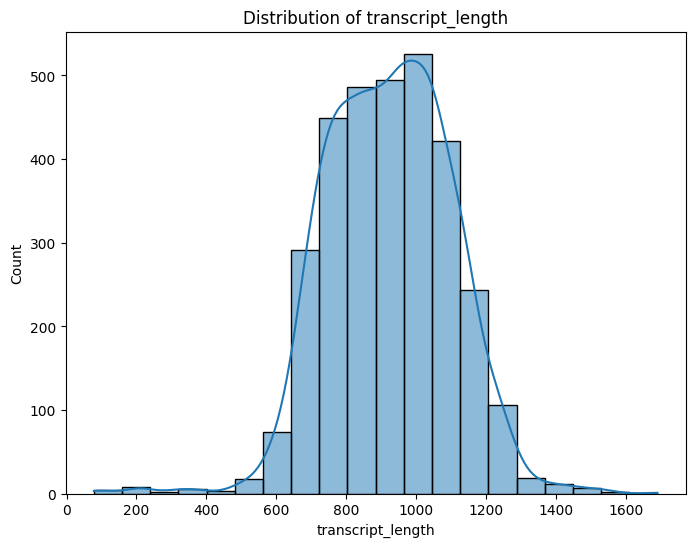

--- Summary of transcript_length Distribution ---
   - Mean: 923.22
   - Median: 926.50
   - Standard Deviation: 178.09
   - The distribution of transcript_length is negatively skewed.
   - transcript_length appears to have a skewed distribution.
   ----------------------------------------------------



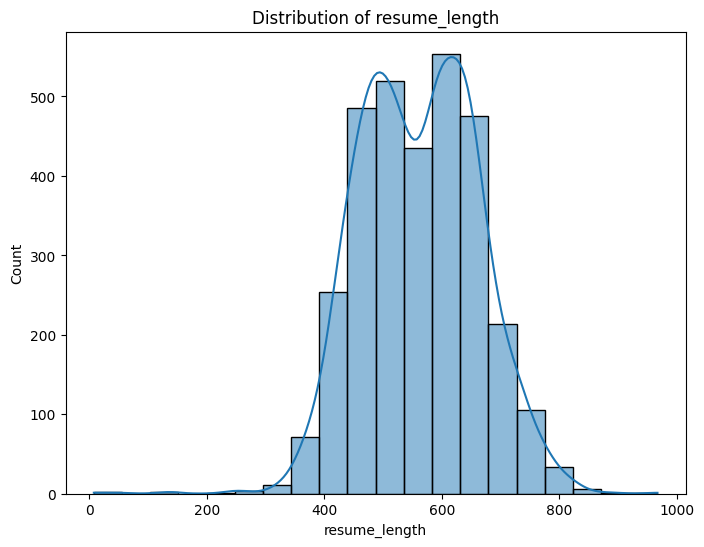

--- Summary of resume_length Distribution ---
   - Mean: 561.30
   - Median: 562.00
   - Standard Deviation: 99.26
   - The distribution of resume_length is negatively skewed.
   - resume_length appears to have a skewed distribution.
   ----------------------------------------------------



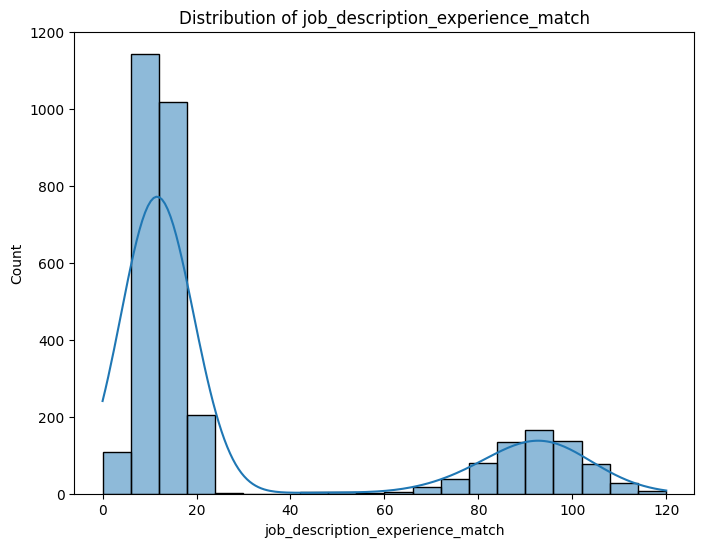

--- Summary of job_description_experience_match Distribution ---
   - Mean: 29.22
   - Median: 13.00
   - Standard Deviation: 33.47
   - The distribution of job_description_experience_match is positively skewed.
   - job_description_experience_match appears to have a skewed distribution.
   ----------------------------------------------------



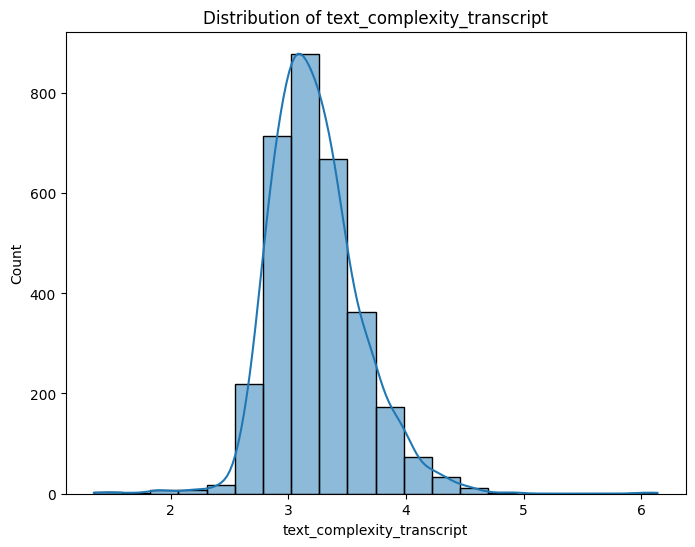

--- Summary of text_complexity_transcript Distribution ---
   - Mean: 3.23
   - Median: 3.19
   - Standard Deviation: 0.38
   - The distribution of text_complexity_transcript is positively skewed.
   - text_complexity_transcript appears to have a normal distribution.
   ----------------------------------------------------



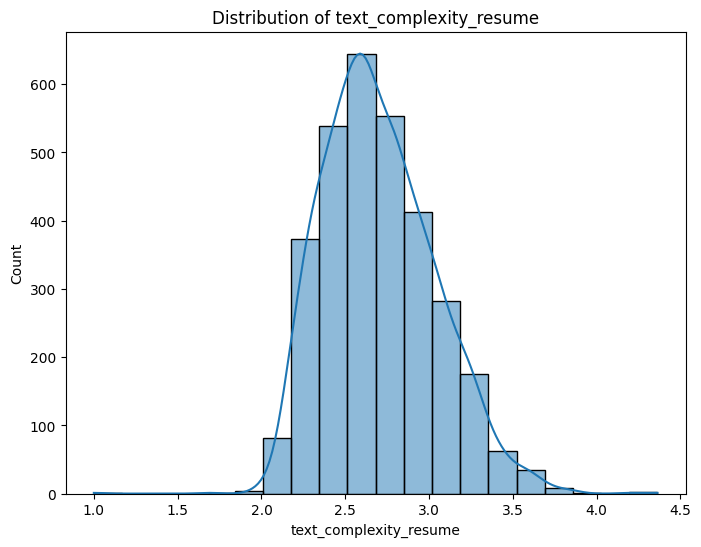

--- Summary of text_complexity_resume Distribution ---
   - Mean: 2.70
   - Median: 2.66
   - Standard Deviation: 0.33
   - The distribution of text_complexity_resume is positively skewed.
   - text_complexity_resume appears to have a normal distribution.
   ----------------------------------------------------



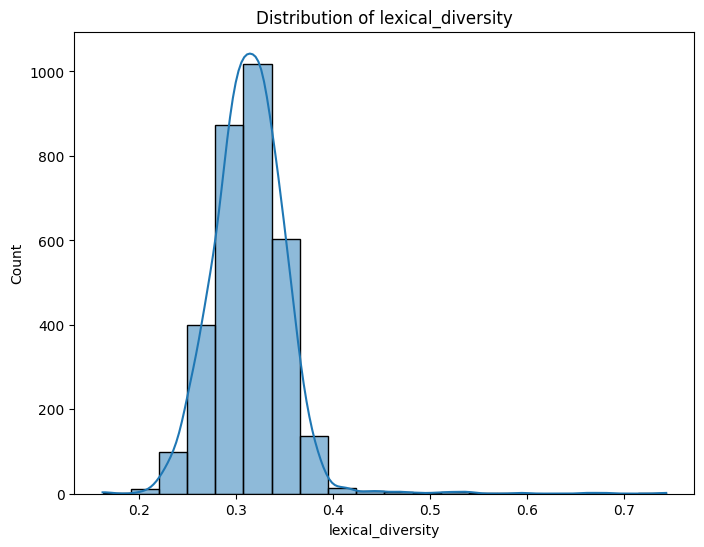

--- Summary of lexical_diversity Distribution ---
   - Mean: 0.31
   - Median: 0.31
   - Standard Deviation: 0.04
   - The distribution of lexical_diversity is positively skewed.
   - lexical_diversity appears to have a normal distribution.
   ----------------------------------------------------



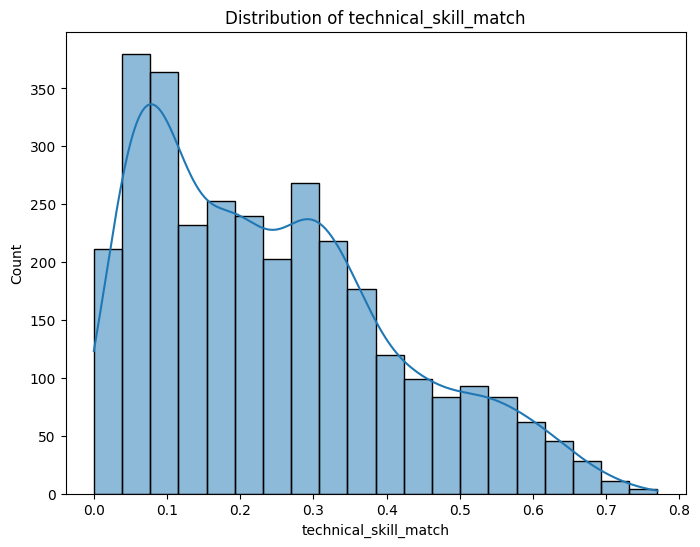

--- Summary of technical_skill_match Distribution ---
   - Mean: 0.24
   - Median: 0.22
   - Standard Deviation: 0.17
   - The distribution of technical_skill_match is positively skewed.
   - technical_skill_match appears to have a normal distribution.
   ----------------------------------------------------



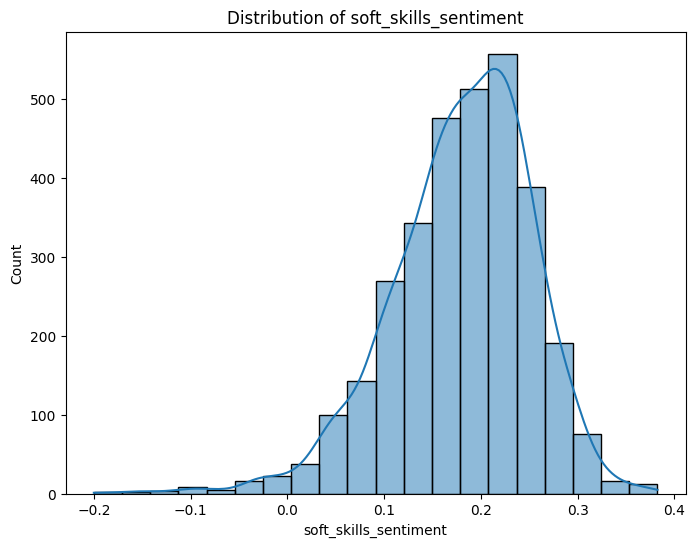

--- Summary of soft_skills_sentiment Distribution ---
   - Mean: 0.18
   - Median: 0.19
   - Standard Deviation: 0.07
   - The distribution of soft_skills_sentiment is negatively skewed.
   - soft_skills_sentiment appears to have a normal distribution.
   ----------------------------------------------------



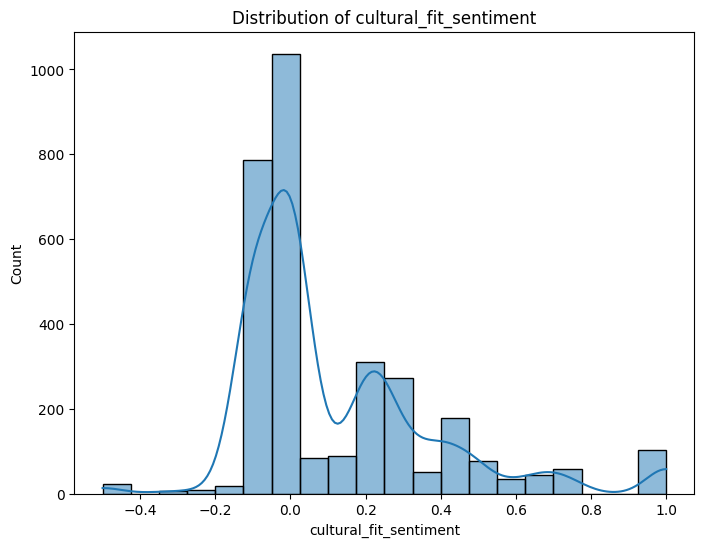

--- Summary of cultural_fit_sentiment Distribution ---
   - Mean: 0.12
   - Median: 0.00
   - Standard Deviation: 0.27
   - The distribution of cultural_fit_sentiment is positively skewed.
   - cultural_fit_sentiment appears to have a skewed distribution.
   ----------------------------------------------------



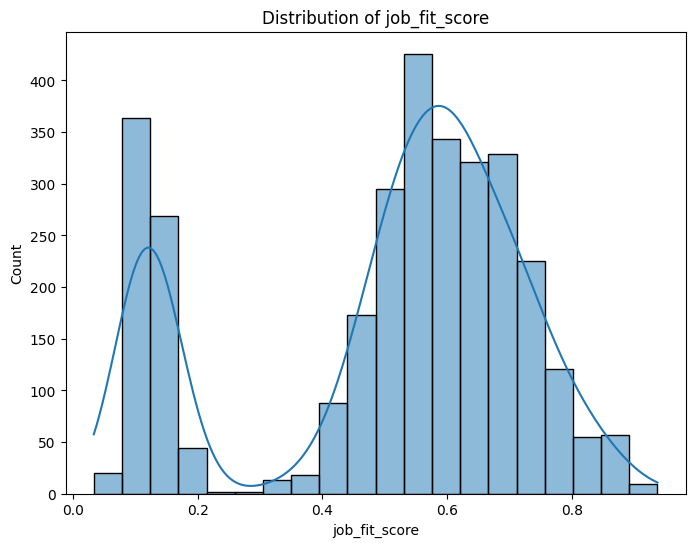

--- Summary of job_fit_score Distribution ---
   - Mean: 0.50
   - Median: 0.56
   - Standard Deviation: 0.22
   - The distribution of job_fit_score is negatively skewed.
   - job_fit_score appears to have a normal distribution.
   ----------------------------------------------------



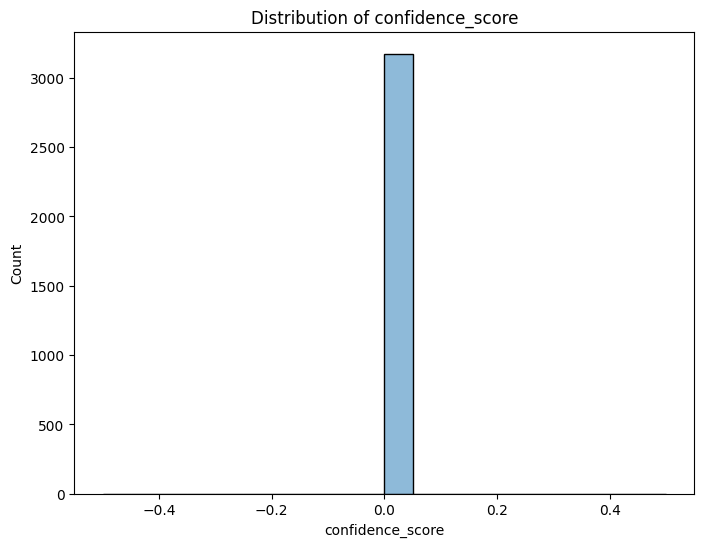

--- Summary of confidence_score Distribution ---
   - Mean: 0.00
   - Median: 0.00
   - Standard Deviation: 0.00
   - The distribution of confidence_score is symmetric.
   - confidence_score appears to have a normal distribution.
   ----------------------------------------------------



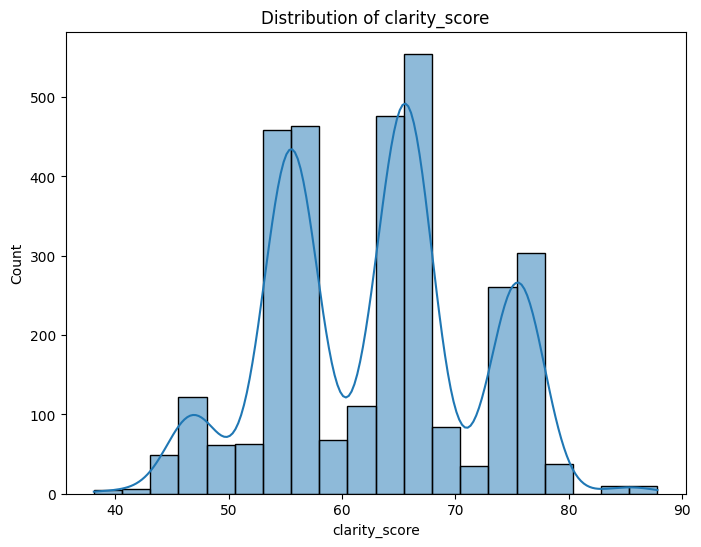

--- Summary of clarity_score Distribution ---
   - Mean: 62.83
   - Median: 64.20
   - Standard Deviation: 8.82
   - The distribution of clarity_score is negatively skewed.
   - clarity_score appears to have a skewed distribution.
   ----------------------------------------------------



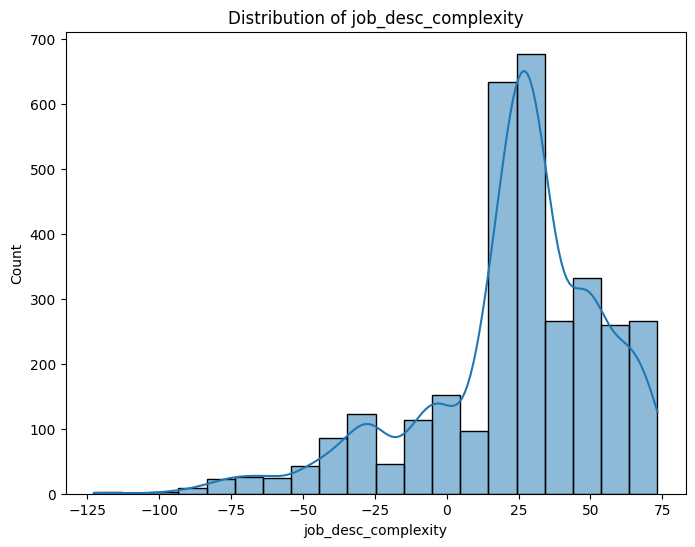

--- Summary of job_desc_complexity Distribution ---
   - Mean: 23.72
   - Median: 27.49
   - Standard Deviation: 31.28
   - The distribution of job_desc_complexity is negatively skewed.
   - job_desc_complexity appears to have a skewed distribution.
   ----------------------------------------------------



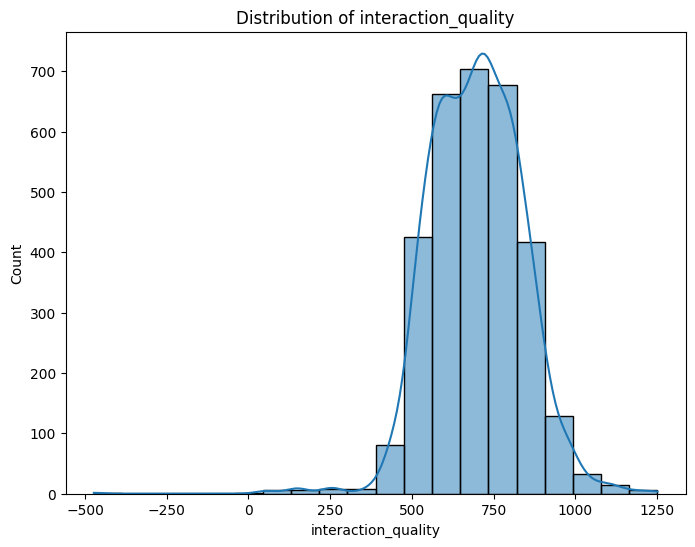

--- Summary of interaction_quality Distribution ---
   - Mean: 697.55
   - Median: 698.37
   - Standard Deviation: 141.01
   - The distribution of interaction_quality is negatively skewed.
   - interaction_quality appears to have a skewed distribution.
   ----------------------------------------------------



In [3]:
# List of numerical features to analyze
numerical_features = ['num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'transcript_length', 'resume_length',
       'job_description_experience_match', 'text_complexity_transcript',
       'text_complexity_resume', 'lexical_diversity',
       'technical_skill_match', 'soft_skills_sentiment',
       'cultural_fit_sentiment', 'job_fit_score', 'confidence_score',
       'clarity_score', 'job_desc_complexity', 'interaction_quality']

# Loop through each feature and plot its distribution
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=20)  # Create histogram with KDE curve
    plt.title(f'Distribution of {feature}')
    plt.show()
    
    # Summary of the plot
    print(f"--- Summary of {feature} Distribution ---")
    # Analyze the feature's distribution
    feature_data = data[feature]
    mean_value = feature_data.mean()
    median_value = feature_data.median()
    std_value = feature_data.std()
    
    print(f"   - Mean: {mean_value:.2f}")
    print(f"   - Median: {median_value:.2f}")
    print(f"   - Standard Deviation: {std_value:.2f}")
    
    # Insights based on distribution (adjust based on the feature type)
    if mean_value > median_value:
        print(f"   - The distribution of {feature} is positively skewed.")
    elif mean_value < median_value:
        print(f"   - The distribution of {feature} is negatively skewed.")
    else:
        print(f"   - The distribution of {feature} is symmetric.")
    
    print(f"   - {feature} appears to have a {'normal' if abs(mean_value - median_value) < 0.1 else 'skewed'} distribution.")
    print("   ----------------------------------------------------\n")

In [4]:
#Select features for model training (removed the removed features)
X = data[[
    'num_words_in_transcript',
    'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
    'transcript_length', 'resume_length',
    'job_description_experience_match', 'text_complexity_transcript',
    'text_complexity_resume', 'lexical_diversity', 
    'technical_skill_match', 'soft_skills_sentiment',
    'cultural_fit_sentiment', 'job_fit_score', 'confidence_score',
    'clarity_score', 'job_desc_complexity', 'interaction_quality'
]]

y = data['decision']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

# Hyperparameter tuning: Try different values for regularization strength (C)
param_grid = {'C': [0.1, 0.5, 1, 5, 10]}  # Inverse of regularization strength
log_reg = LogisticRegression(solver='liblinear')

# Use GridSearchCV to find the best regularization parameter C
grid_search = GridSearchCV(log_reg, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameter and model
best_C = grid_search.best_params_['C']
best_log_reg_model = grid_search.best_estimator_

# Predict on test set
y_pred_prob = best_log_reg_model.predict_proba(X_test)[:, 1]
y_pred_binary = best_log_reg_model.predict(X_test)

# Calculate accuracy and ROC AUC
log_reg_accuracy = accuracy_score(y_test, y_pred_binary)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
log_reg_roc_auc = auc(fpr, tpr)

# Output the best model's parameters and performance
print(f"Best Logistic Regression Accuracy: {log_reg_accuracy*100:.4f}")
print(f"Best Logistic Regression AUC: {log_reg_roc_auc:.4f}")

c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Logistic Regression Accuracy: 81.4173
Best Logistic Regression AUC: 0.8943


In [7]:
# --- Error Analysis ---
error_analysis = X_test.copy()
error_analysis['True Label'] = y_test
error_analysis['Predicted Label'] = y_pred_binary
error_analysis['Error'] = error_analysis['True Label'] != error_analysis['Predicted Label']

# Display misclassified samples
misclassified_samples = error_analysis[error_analysis['Error'] == True]
print("Misclassified Instances:")
print(misclassified_samples.head())  # Displaying the first few misclassified instances

Misclassified Instances:
      num_words_in_transcript  resume_jd_similarity  \
1771                      735              0.204282   
3115                      847              0.269972   
654                       548              0.213232   
1551                      539              0.335625   
2876                      772              0.155692   

      resume_transcript_similarity  sentiment  transcript_length  \
1771                      0.369067     0.9972                926   
3115                      0.380608     0.9990               1190   
654                       0.252388     0.9964                673   
1551                      0.430371     0.9967                678   
2876                      0.507486     0.9982               1071   

      resume_length  job_description_experience_match  \
1771            509                                16   
3115            493                                18   
654             374                                15   
1551   

In [8]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_samples)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified

'Total number of misclassified instances: 118'

In [9]:
# Fit the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Now you can calculate the impact as you were doing
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg_model.coef_[0],  # Coefficients from the model
    'Impact': abs(log_reg_model.coef_[0]) * X_train.std()  # Impact = coefficient * std deviation
})

# Sorting by impact to see the features with the highest influence
coefficients_sorted = coefficients.sort_values(by='Impact', ascending=False)

# Printing the impact analysis summary
print("Impact Analysis (Logistic Regression):")
print(coefficients_sorted)

Impact Analysis (Logistic Regression):
                                                           Feature  \
num_words_in_transcript                    num_words_in_transcript   
text_complexity_transcript              text_complexity_transcript   
cultural_fit_sentiment                      cultural_fit_sentiment   
interaction_quality                            interaction_quality   
transcript_length                                transcript_length   
job_description_experience_match  job_description_experience_match   
text_complexity_resume                      text_complexity_resume   
resume_length                                        resume_length   
job_desc_complexity                            job_desc_complexity   
resume_transcript_similarity          resume_transcript_similarity   
resume_jd_similarity                          resume_jd_similarity   
clarity_score                                        clarity_score   
job_fit_score                                      

c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


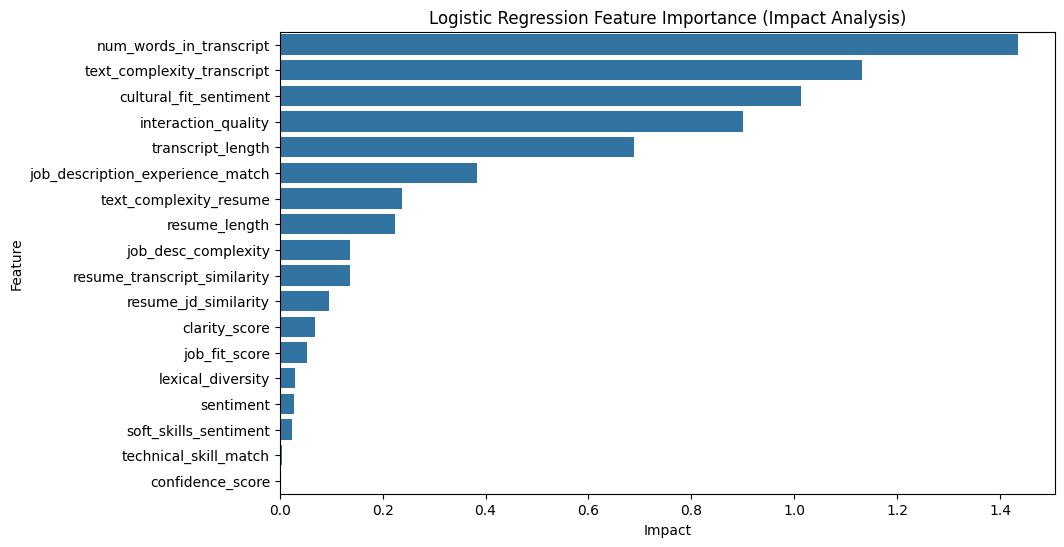

Summary of Feature Importance:
The plot above shows the importance of features in predicting the target variable based on their impact. The impact is calculated as the product of the absolute coefficient and the standard deviation of each feature.

Top 5 most impactful features:
num_words_in_transcript: Coefficient = 0.0103, Impact = 1.4348
text_complexity_transcript: Coefficient = -2.8995, Impact = 1.1317
cultural_fit_sentiment: Coefficient = 3.8128, Impact = 1.0123
interaction_quality: Coefficient = 0.0063, Impact = 0.9004
transcript_length: Coefficient = -0.0038, Impact = 0.6891


In [10]:
# --- Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Impact', y='Feature', data=coefficients_sorted)
plt.title('Logistic Regression Feature Importance (Impact Analysis)')
plt.show()

# --- Summary ---
top_features = coefficients_sorted.head(5)  # Top 5 features by impact

# Summarizing the plot
print("Summary of Feature Importance:")
print(f"The plot above shows the importance of features in predicting the target variable based on their impact. The impact is calculated as the product of the absolute coefficient and the standard deviation of each feature.")
print("\nTop 5 most impactful features:")
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: Coefficient = {row['Coefficient']:.4f}, Impact = {row['Impact']:.4f}")

Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Decision Tree Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

dt_best = grid_search.best_estimator_
dt_y_pred = dt_best.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_roc_auc = roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1])

In [12]:
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')
print(f'Decision Tree ROC AUC: {dt_roc_auc:.4f}')

Decision Tree Accuracy: 85.35%
Decision Tree ROC AUC: 0.9071


In [13]:
# Error Analysis
dt_errors = X_test.copy()
dt_errors['True Label'] = y_test
dt_errors['Predicted Label'] = dt_best.predict(X_test)
dt_errors['Error'] = dt_errors['True Label'] != dt_errors['Predicted Label']

# Display a few misclassified instances
misclassified_dt = dt_errors[dt_errors['Error'] == True]
print("Misclassified Instances (Decision Tree):")
print(misclassified_dt.head())

Misclassified Instances (Decision Tree):
      num_words_in_transcript  resume_jd_similarity  \
1655                      648              0.250854   
1771                      735              0.204282   
1566                      636              0.256930   
1850                      636              0.181735   
3115                      847              0.269972   

      resume_transcript_similarity  sentiment  transcript_length  \
1655                      0.397662     0.9947                799   
1771                      0.369067     0.9972                926   
1566                      0.296303     0.9994                817   
1850                      0.290789     0.9975                881   
3115                      0.380608     0.9990               1190   

      resume_length  job_description_experience_match  \
1655            490                                15   
1771            509                                16   
1566            448                             

In [14]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_dt)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified

'Total number of misclassified instances: 93'

In [15]:
 # Impact Analysis (using feature importances)
dt_feature_importance = dt_best.feature_importances_
dt_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (Decision Tree):")
print(dt_impact_analysis)

Impact Analysis (Decision Tree):
                             Feature  Importance
15                     clarity_score    0.308625
12            cultural_fit_sentiment    0.175474
2       resume_transcript_similarity    0.100273
5                      resume_length    0.095651
17               interaction_quality    0.054289
13                     job_fit_score    0.045608
1               resume_jd_similarity    0.045433
3                          sentiment    0.033477
9                  lexical_diversity    0.026298
4                  transcript_length    0.023870
11             soft_skills_sentiment    0.021639
16               job_desc_complexity    0.013907
6   job_description_experience_match    0.013437
7         text_complexity_transcript    0.012843
10             technical_skill_match    0.011786
8             text_complexity_resume    0.009353
0            num_words_in_transcript    0.008036
14                  confidence_score    0.000000


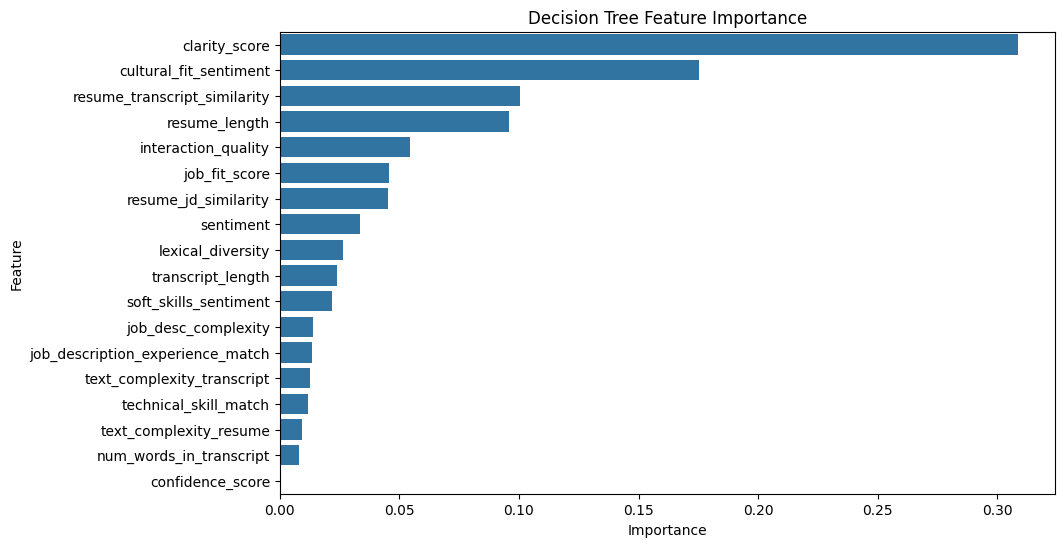

Summary of Feature Importance (Decision Tree):
The plot above shows the feature importance in the Decision Tree model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
clarity_score: Importance = 0.3086
cultural_fit_sentiment: Importance = 0.1755
resume_transcript_similarity: Importance = 0.1003
resume_length: Importance = 0.0957
interaction_quality: Importance = 0.0543


In [16]:
# --- Decision Tree Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_impact_analysis)
plt.title('Decision Tree Feature Importance')
plt.show()

# --- Summary ---
top_dt_features = dt_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (Decision Tree):")
print(f"The plot above shows the feature importance in the Decision Tree model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_dt_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")

Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Random Forest Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

rf_best = grid_search.best_estimator_
rf_y_pred = rf_best.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])

print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print(f'Random Forest ROC AUC: {rf_roc_auc:.4f}')

Random Forest Accuracy: 86.61%
Random Forest ROC AUC: 0.9587


In [18]:
# Error Analysis
rf_errors = X_test.copy()
rf_errors['True Label'] = y_test
rf_errors['Predicted Label'] = rf_best.predict(X_test)
rf_errors['Error'] = rf_errors['True Label'] != rf_errors['Predicted Label']

# Display a few misclassified instances
misclassified_rf = rf_errors[rf_errors['Error'] == True]
print("Misclassified Instances (Random Forest):")
print(misclassified_rf.head())

Misclassified Instances (Random Forest):
      num_words_in_transcript  resume_jd_similarity  \
1655                      648              0.250854   
1551                      539              0.335625   
1741                      607              0.207765   
3121                      702              0.332853   
1966                      529              0.227032   

      resume_transcript_similarity  sentiment  transcript_length  \
1655                      0.397662     0.9947                799   
1551                      0.430371     0.9967                678   
1741                      0.362281     0.9980                852   
3121                      0.414018     0.9956                938   
1966                      0.271773     0.9964                691   

      resume_length  job_description_experience_match  \
1655            490                                15   
1551            478                                14   
1741            496                             

In [19]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_rf)

# Professional phrasing
total_misclassified = f'Total number of misclassified instances: {misclassified_count}'
total_misclassified

'Total number of misclassified instances: 85'

In [20]:
# Impact Analysis (using feature importances)
rf_feature_importance = rf_best.feature_importances_
rf_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (Random Forest):")
print(rf_impact_analysis)

Impact Analysis (Random Forest):
                             Feature  Importance
15                     clarity_score    0.144219
2       resume_transcript_similarity    0.131847
12            cultural_fit_sentiment    0.109857
3                          sentiment    0.081749
9                  lexical_diversity    0.061306
17               interaction_quality    0.056737
7         text_complexity_transcript    0.054831
0            num_words_in_transcript    0.048486
5                      resume_length    0.041614
13                     job_fit_score    0.041206
1               resume_jd_similarity    0.039757
4                  transcript_length    0.039052
10             technical_skill_match    0.038669
11             soft_skills_sentiment    0.038334
8             text_complexity_resume    0.030245
16               job_desc_complexity    0.021175
6   job_description_experience_match    0.020916
14                  confidence_score    0.000000


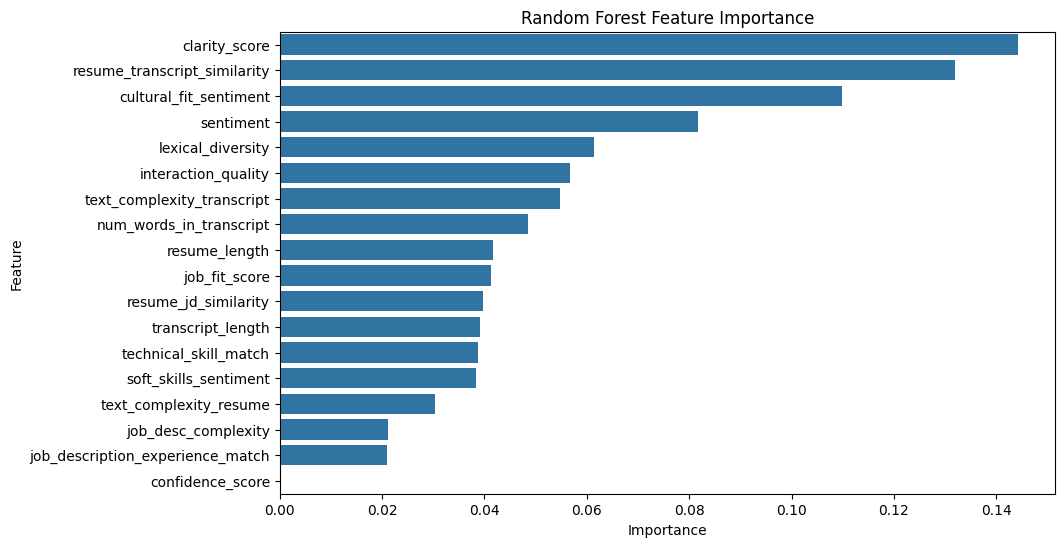

Summary of Feature Importance (Random Forest):
The plot above shows the feature importance in the Random Forest model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
clarity_score: Importance = 0.1442
resume_transcript_similarity: Importance = 0.1318
cultural_fit_sentiment: Importance = 0.1099
sentiment: Importance = 0.0817
lexical_diversity: Importance = 0.0613


In [21]:
# --- Random Forest Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_impact_analysis)
plt.title('Random Forest Feature Importance')
plt.show()

# --- Summary ---
top_rf_features = rf_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (Random Forest):")
print(f"The plot above shows the feature importance in the Random Forest model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_rf_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")

XGBoost

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# XGBoost Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

xgb_best = grid_search.best_estimator_
xgb_y_pred = xgb_best.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_best.predict_proba(X_test)[:, 1])

print(f'XGBoost Accuracy: {xgb_accuracy * 100:.2f}%')
print(f'XGBoost ROC AUC: {xgb_roc_auc:.4f}')

XGBoost Accuracy: 87.72%
XGBoost ROC AUC: 0.9666


In [23]:
# Error Analysis
xgb_errors = X_test.copy()
xgb_errors['True Label'] = y_test
xgb_errors['Predicted Label'] = xgb_best.predict(X_test)
xgb_errors['Error'] = xgb_errors['True Label'] != xgb_errors['Predicted Label']

# Display a few misclassified instances
misclassified_xgb = xgb_errors[xgb_errors['Error'] == True]
print("Misclassified Instances (XGBoost):")
print(misclassified_xgb.head())

Misclassified Instances (XGBoost):
      num_words_in_transcript  resume_jd_similarity  \
1655                      648              0.250854   
1566                      636              0.256930   
1551                      539              0.335625   
1874                      606              0.260731   
1703                      662              0.325212   

      resume_transcript_similarity  sentiment  transcript_length  \
1655                      0.397662     0.9947                799   
1566                      0.296303     0.9994                817   
1551                      0.430371     0.9967                678   
1874                      0.364661     0.9956                782   
1703                      0.291638     0.9977                838   

      resume_length  job_description_experience_match  \
1655            490                                15   
1566            448                                12   
1551            478                                14 

In [24]:
# Counting the total number of misclassified instances
misclassified_count = len(misclassified_xgb)

# Professional phrasing
total_misclassified = f"Total number of misclassified instances: {misclassified_count}"
total_misclassified

'Total number of misclassified instances: 78'

In [25]:
# Impact Analysis (using feature importances)
xgb_feature_importance = xgb_best.get_booster().get_score(importance_type='weight')
xgb_impact_analysis = pd.DataFrame(list(xgb_feature_importance.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (XGBoost):")
print(xgb_impact_analysis)

Impact Analysis (XGBoost):
                             Feature  Importance
5                      resume_length       296.0
14                     clarity_score       272.0
2       resume_transcript_similarity       238.0
13                     job_fit_score       221.0
8             text_complexity_resume       220.0
11             soft_skills_sentiment       213.0
1               resume_jd_similarity       206.0
7         text_complexity_transcript       202.0
4                  transcript_length       199.0
10             technical_skill_match       197.0
3                          sentiment       177.0
12            cultural_fit_sentiment       153.0
15               job_desc_complexity       148.0
0            num_words_in_transcript       134.0
6   job_description_experience_match       115.0
16               interaction_quality       112.0
9                  lexical_diversity        43.0


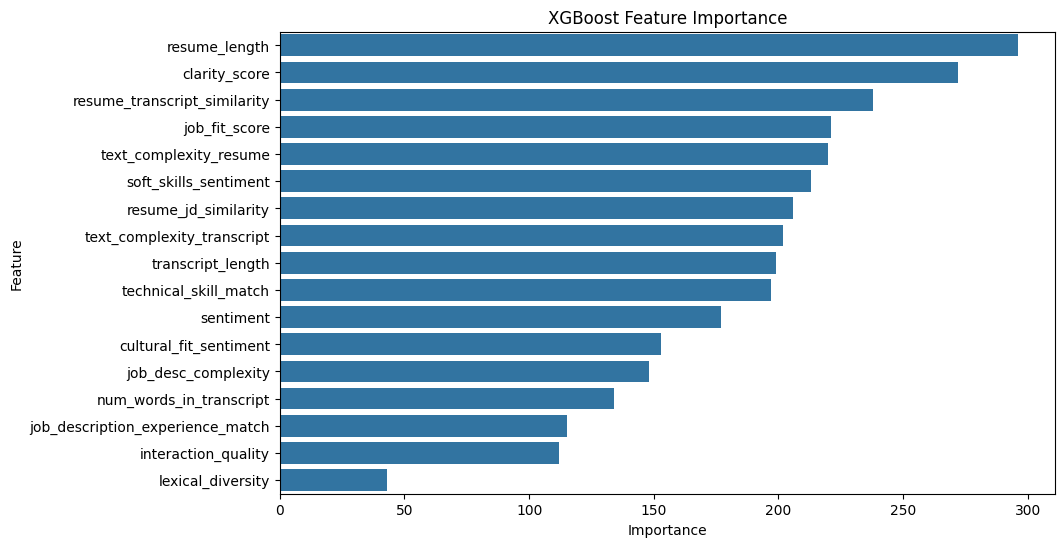

Summary of Feature Importance (XGBoost):
The plot above shows the feature importance in the XGBoost model. Features with higher importance have a stronger influence on the model's predictions.

Top 5 most impactful features:
resume_length: Importance = 296.0000
clarity_score: Importance = 272.0000
resume_transcript_similarity: Importance = 238.0000
job_fit_score: Importance = 221.0000
text_complexity_resume: Importance = 220.0000


In [26]:
# --- XGBoost Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_impact_analysis)
plt.title('XGBoost Feature Importance')
plt.show()

# --- Summary ---
top_xgb_features = xgb_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("Summary of Feature Importance (XGBoost):")
print(f"The plot above shows the feature importance in the XGBoost model. Features with higher importance have a stronger influence on the model's predictions.")
print("\nTop 5 most impactful features:")
for i, row in top_xgb_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")

XG Boost is my best model analysis

c:\Users\Durgesh Babu\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 94%|=================== | 2396/2539 [00:16<00:00]       

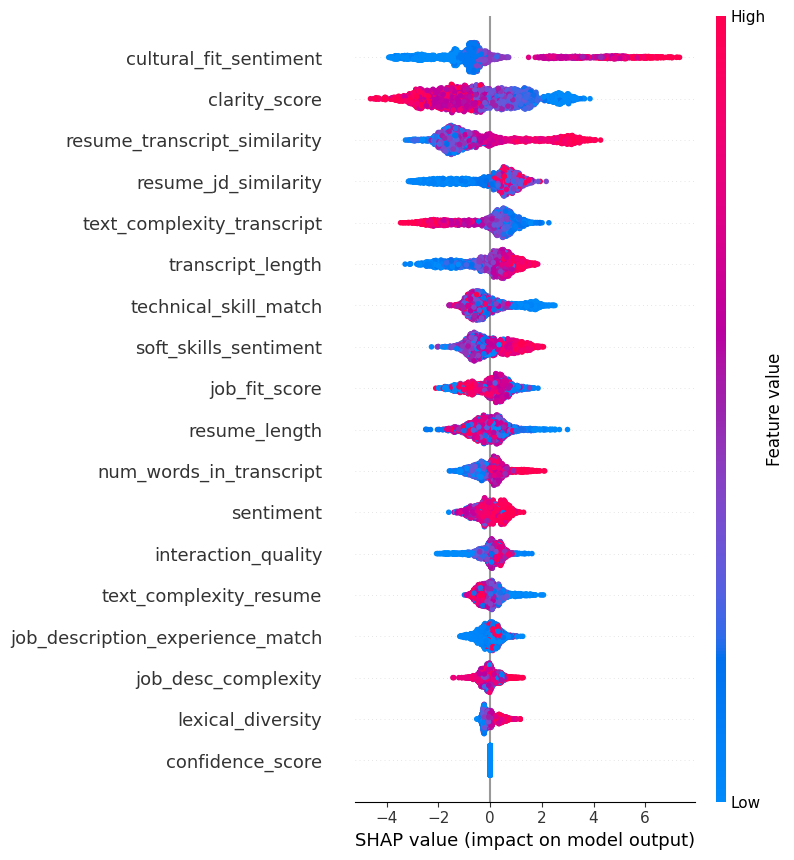

In [27]:
import shap

# Ensure you use the correct trained model, e.g., xgb_best from your tuning process
explainer = shap.Explainer(xgb_best, X_train)

# Calculate SHAP values for the training data
shap_values = explainer(X_train)

# Plot feature importance using SHAP
shap.summary_plot(shap_values, X_train)

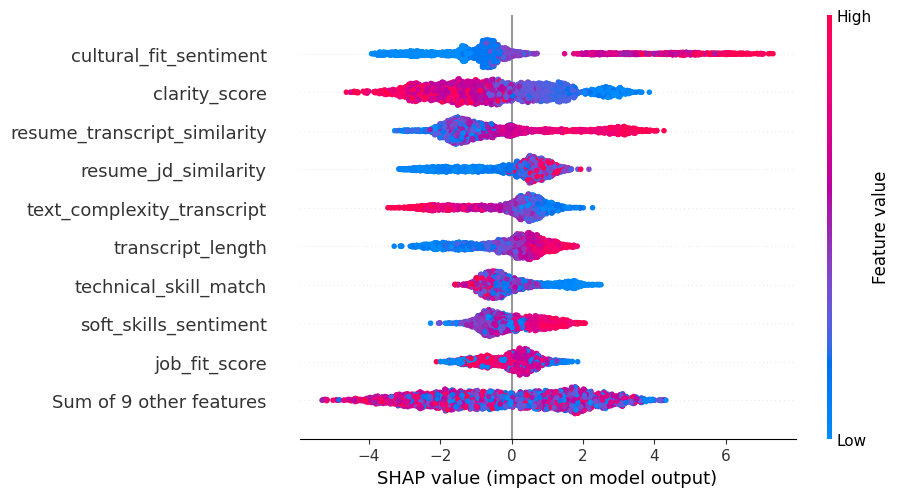

In [28]:
# Beeswarm plot for SHAP values
shap.plots.beeswarm(shap_values)

Feature-Wise Insights (Beeswarm)

1. Cultural Fit Sentiment:

    High values (red) positively influence predictions, significantly pushing the model output higher.

    Low values (blue) have a neutral or slightly negative impact, indicating cultural fit is a critical factor.

2. Clarity Score:

    High values strongly increase the output, highlighting that clarity is a significant determinant.
    
    Low clarity creates a substantial downward pull on predictions.

3. Resume-Transcript Similarity:

    Higher similarity contributes positively to predictions, as alignment between resume and transcript is key.

    Lower similarity has an adverse effect, decreasing the model’s confidence in the prediction.

4. Resume-JD Similarity:

    Similar trends as Resume-Transcript Similarity, showing that resume alignment with job descriptions is critical.

5. Text Complexity in Transcript:

    Moderate complexity (middle SHAP values) positively influences predictions.
    
    Extremely high complexity negatively impacts output, suggesting diminishing returns or misalignment for overly complex text.

6. Transcript Length:

    Optimal length (moderate values) increases predictions.

    Too short or excessively long transcripts pull predictions downward, possibly due to insufficient or verbose communication.

7. Technical Skill Match:

    Strong positive influence for high values, reflecting its critical role in decision-making.

    Low scores drastically reduce predictions.

8. Soft Skills Sentiment:

    High values significantly boost predictions, indicating that soft skills sentiment carries weight.
    
    Low values reduce predictions, showing a penalty for poor sentiment.

9. Job Fit Score:

    Strong correlation with positive predictions when high, signifying its core importance.

10. Sum of Other Features:

    Aggregated minor features show mixed effects but have less overall importance compared to primary features.


In [29]:
base_value  = explainer.expected_value
print(f"Base Value: {base_value}")

Base Value: 1.2111205252695545


In [30]:
shap_values_test = explainer(X_test)  


--- SHAP Waterfall Plot for Instance (LOW prediction) ---


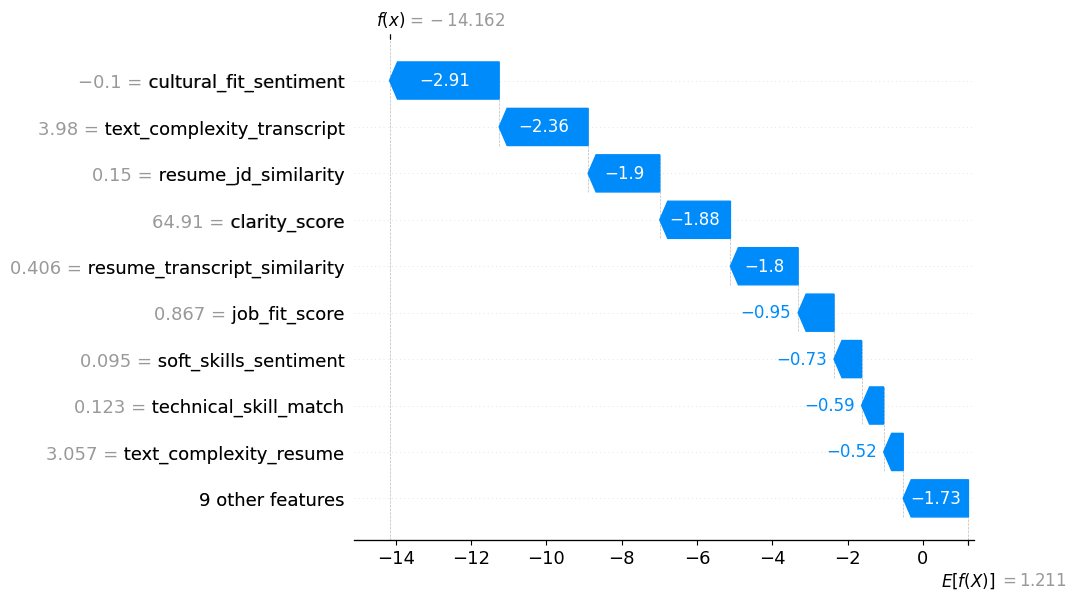


Summary:
Base Probability: 77.0497%
Predicted Probability: 0.0001%

Top Contributing Features:
  - cultural_fit_sentiment: -2.9113 (decreases prediction)
  - text_complexity_transcript: -2.3623 (decreases prediction)
  - resume_jd_similarity: -1.9025 (decreases prediction)
  - clarity_score: -1.8765 (decreases prediction)
  - resume_transcript_similarity: -1.7977 (decreases prediction)

Feature Value Insights:
  - cultural_fit_sentiment has a value of -0.1000, contributing -2.9113.
  - text_complexity_transcript has a value of 3.9798, contributing -2.3623.
  - resume_jd_similarity has a value of 0.1501, contributing -1.9025.
  - clarity_score has a value of 64.9100, contributing -1.8765.
  - resume_transcript_similarity has a value of 0.4061, contributing -1.7977.

--- SHAP Waterfall Plot for Instance (HIGH prediction) ---


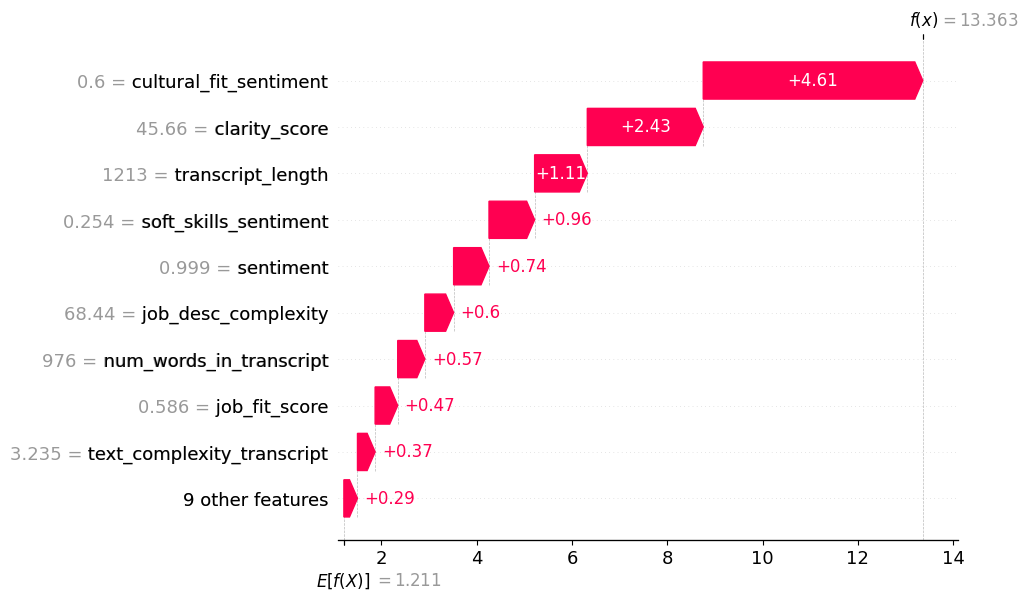


Summary:
Base Probability: 77.0497%
Predicted Probability: 99.9998%

Top Contributing Features:
  - cultural_fit_sentiment: 4.6085 (increases prediction)
  - clarity_score: 2.4334 (increases prediction)
  - transcript_length: 1.1057 (increases prediction)
  - soft_skills_sentiment: 0.9577 (increases prediction)
  - sentiment: 0.7428 (increases prediction)

Feature Value Insights:
  - cultural_fit_sentiment has a value of 0.6000, contributing 4.6085.
  - clarity_score has a value of 45.6600, contributing 2.4334.
  - transcript_length has a value of 1213.0000, contributing 1.1057.
  - soft_skills_sentiment has a value of 0.2538, contributing 0.9577.
  - sentiment has a value of 0.9994, contributing 0.7428.

--- SHAP Waterfall Plot for Instance (MEDIUM prediction) ---


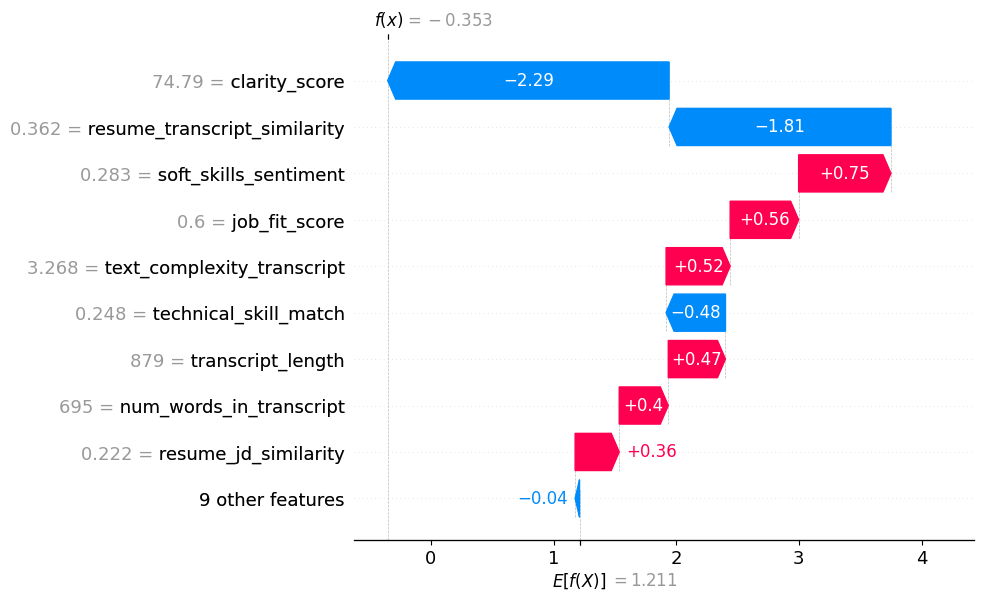


Summary:
Base Probability: 77.0497%
Predicted Probability: 41.2661%

Top Contributing Features:
  - clarity_score: -2.2943 (decreases prediction)
  - resume_transcript_similarity: -1.8087 (decreases prediction)
  - soft_skills_sentiment: 0.7525 (increases prediction)
  - job_fit_score: 0.5583 (increases prediction)
  - text_complexity_transcript: 0.5224 (increases prediction)

Feature Value Insights:
  - clarity_score has a value of 74.7900, contributing -2.2943.
  - resume_transcript_similarity has a value of 0.3625, contributing -1.8087.
  - soft_skills_sentiment has a value of 0.2834, contributing 0.7525.
  - job_fit_score has a value of 0.6000, contributing 0.5583.
  - text_complexity_transcript has a value of 3.2677, contributing 0.5224.


In [48]:
# Function to find instances based on prediction type
def find_instance_index(predictions, target):
    if target == "low":
        return np.argmin(predictions)  # Instance with the lowest prediction
    elif target == "high":
        return np.argmax(predictions)  # Instance with the highest prediction
    elif target == "medium":
        median_value = np.median(predictions)
        return np.argmin(np.abs(predictions - median_value))  # Closest to the median

# Get predictions from SHAP base + contributions
predictions = [shap_value.base_values + shap_value.values.sum() for shap_value in shap_values_test]

# Find indices for low, high, and medium predictions
low_index = find_instance_index(predictions, "low")
high_index = find_instance_index(predictions, "high")
medium_index = find_instance_index(predictions, "medium")

# Analyze these indices
for instance_index, target in zip([low_index, high_index, medium_index], ["low", "high", "medium"]):
    shap_value = shap_values_test[instance_index]
    
    # Generate the waterfall plot
    print(f"\n--- SHAP Waterfall Plot for Instance ({target.upper()} prediction) ---")
    shap.plots.waterfall(shap_value)
    
    # Extract information for summary
    feature_contributions = shap_value.values
    base_value = shap_value.base_values 
    predicted_value = base_value + feature_contributions.sum() 
    feature_names = shap_value.feature_names
    top_features = sorted(zip(feature_names, feature_contributions), key=lambda x: abs(x[1]), reverse=True)[:5]
    
    # Convert log-odds to probabilities
    base_probability = 1 / (1 + np.exp(-base_value))  
    predicted_probability = 1 / (1 + np.exp(-predicted_value)) 
    
    # Print summary
    print("\nSummary:")
    print(f"Base Probability: {base_probability:.4%}")
    print(f"Predicted Probability: {predicted_probability:.4%}")
    
    print("\nTop Contributing Features:")
    for feature, contribution in top_features:
        direction = "increases" if contribution > 0 else "decreases"
        print(f"  - {feature}: {contribution:.4f} ({direction} prediction)")
    
    # Feature value insight
    print("\nFeature Value Insights:")
    for feature, contribution in top_features:
        feature_index = feature_names.index(feature)
        feature_value = shap_value.data[feature_index]
        print(f"  - {feature} has a value of {feature_value:.4f}, contributing {contribution:.4f}.")


SHAP Dependency Plot

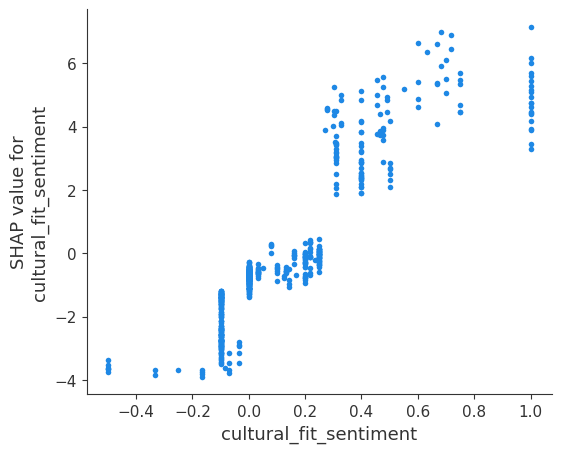

In [38]:
# Dependency Plot Feature 1
features_to_plot = "cultural_fit_sentiment" 
shap.dependence_plot(
    ind=features_to_plot, 
    shap_values=shap_values_test.values,  
    features=X_test.values,  
    feature_names=X_test.columns, 
    interaction_index=None, 
    cmap=plt.cm.Reds  
)



Higher Cultural Fit Sentiment: Higher values of "cultural_fit_sentiment" generally lead to higher SHAP values, suggesting a stronger positive impact on the model's output.

Clustered Data: Most observations have moderate cultural fit sentiment and SHAP values, indicating that extreme values are less common.

Outliers Impact: Extreme values of cultural fit sentiment can significantly influence the model's predictions, highlighting the importance of considering outliers in the analysis.

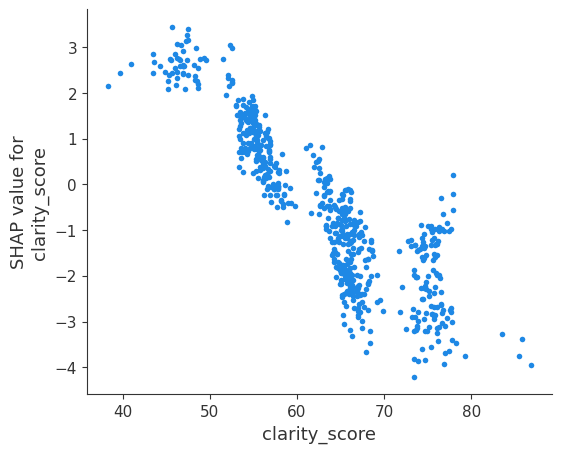

In [39]:
# Dependency Plot Feature 2
feature_name = "clarity_score"  

shap.dependence_plot(
    ind=feature_name, 
    shap_values=shap_values_test.values,  
    features=X_test.values,  
    feature_names=X_test.columns, 
    interaction_index=None, 
    cmap=plt.cm.Reds  
)

Negative Impact: Higher clarity_score negatively influences the model's output, especially when it increases beyond 60.

Clustered Sensitivity: The model shows sensitivity to changes in clarity_score within specific ranges (around 50, 60, and 70).

Extremes: Extreme values of clarity scores (both low and high) have significant impacts on the model's predictions, with low scores having a positive impact and high scores having a negative impact.

There is a noticeable drop in SHAP values as clarity_score increases from 40 to 70, after which the SHAP values stabilize around -3 to -4. This trend indicates that the negative impact of clarity scores on the model's prediction becomes more pronounced until it stabilizes.

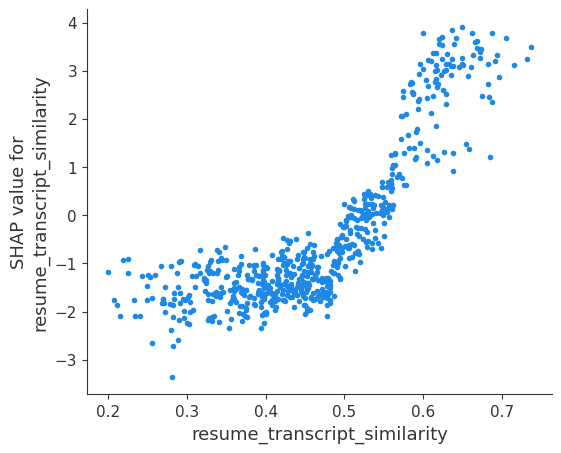

In [40]:
# Dependency Plot for Feature 3
feature_name = "resume_transcript_similarity"  

shap.dependence_plot(
    ind=feature_name, 
    shap_values=shap_values_test.values,  
    features=X_test.values, 
    feature_names=X_test.columns,  
    interaction_index=None,  
    cmap=plt.cm.Reds  
)


Higher Resume-Transcript Similarity: Higher values of "resume_transcript_similarity" generally lead to higher SHAP values, suggesting a stronger positive impact on the model's output.

Clustered Data: Most observations have moderate resume-transcript similarity and SHAP values, indicating that extreme values are less common.

Outliers Impact: Extreme values of resume-transcript similarity can significantly influence the model's predictions, highlighting the importance of considering outliers in the analysis.

The positive correlation between "resume_transcript_similarity" and "SHAP value for resume_transcript_similarity" can be quantified using the correlation coefficient. A high positive correlation coefficient (close to +1) indicates a strong linear relationship.

A linear regression model can be fitted to the data to quantify the relationship between "resume_transcript_similarity" and SHAP values. The slope of the regression line indicates the rate of increase in SHAP value for a unit increase in resume-transcript similarity.

Partial Dependence Plot

In [41]:
from sklearn.inspection import PartialDependenceDisplay

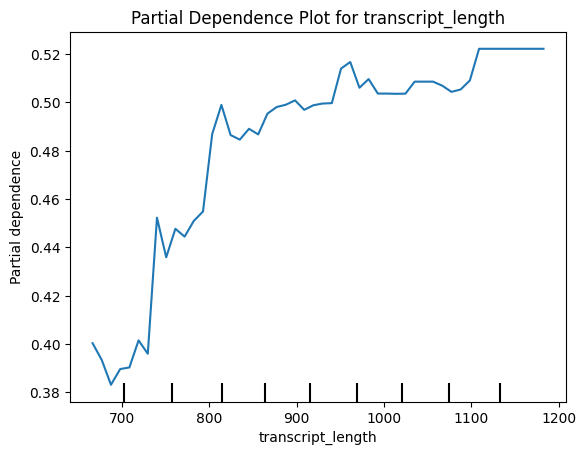

In [43]:
#PartialDependence Plot for Feature
feature_name = "transcript_length"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_test, 
    features=[feature_index], 
    feature_names=X_test.columns,  
    grid_resolution=50,  
    kind="average" 
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()


Non-linear Relationship:

The relationship between transcript length and the predicted outcome is non-linear, with significant fluctuations in the middle range (800 to 1000).

Optimal Range:

The range of 700 to 800 appears to be optimal for increasing the predicted outcome, while further increases beyond 1000 show diminishing returns.

Impact of Shorter and Longer Transcripts:

Shorter transcripts (around 700) have a lower impact on the predicted outcome, while longer transcripts (beyond 1000) stabilize and do not significantly affect the predictions.

Trend:

The overall trend shows an initial increase in partial dependence with increasing transcript length, followed by fluctuations and eventual stabilization.

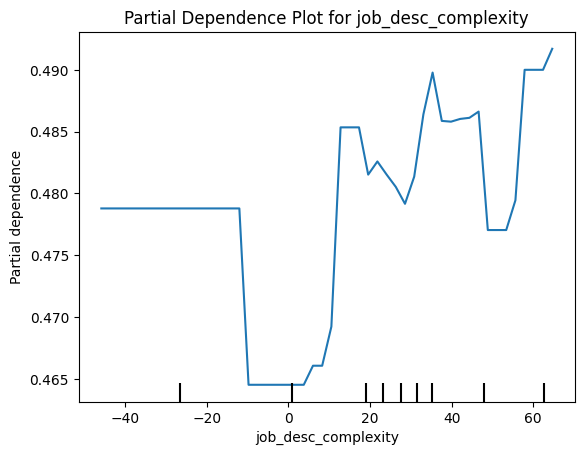

In [44]:
#PartialDependence Plot for Feature2
feature_name = "job_desc_complexity"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_test,  
    features=[feature_index], 
    feature_names=X_test.columns,  
    grid_resolution=50,
    kind="average"  
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()


Negative Impact Zone: When "job_desc_complexity" values are between -20 and 0, the feature has a negative impact on the target variable.

Positive Impact Zone: Values above 0 generally show a positive impact on the target variable, with higher "job_desc_complexity" leading to an increase in the partial dependence value.

Complex Relationship: The fluctuations between 20 and 40 suggest a more intricate relationship, indicating the need for further analysis to understand the underlying factors.

Overall Trend: Despite fluctuations, the overall trend indicates that higher "job_desc_complexity" values tend to positively influence the target variable.

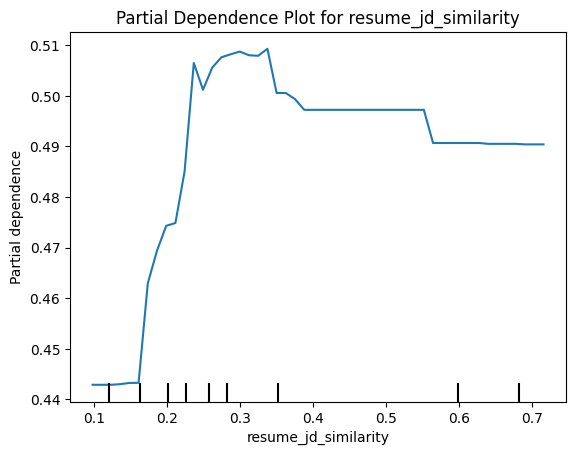

In [46]:
#PartialDependence Plot for Feature3
feature_name = "resume_jd_similarity"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_test, 
    features=[feature_index], 
    feature_names=X_test.columns, 
    grid_resolution=50,  
    kind="average"
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()


Higher Sensitivity at Lower Scores:

The model is more sensitive to changes in "resume_jd_similarity" when the similarity score is low (0.1 to 0.3). Small increases in similarity within this range significantly improve the predicted outcome.

Diminishing Returns:

Beyond a similarity score of 0.3, further increases in "resume_jd_similarity" result in smaller improvements in the predicted outcome. This indicates that once a certain level of similarity is achieved, its additional impact becomes less pronounced.

Common Range:

The majority of resumes have lower similarity scores (0.1 to 0.3), highlighting a potential area for improvement in aligning resumes with job descriptions to achieve better predictions.


The concentration of data points at lower similarity scores suggests that most resumes in the dataset have lower similarity scores with job descriptions.


The stabilization of partial dependence beyond 0.3 indicates that further increases in "resume_jd_similarity" have a less significant impact on the predicted outcome.

2D Partial Dependence Plot


--- 2D Partial Dependence Plot for 'cultural_fit_sentiment' and 'clarity_score' ---


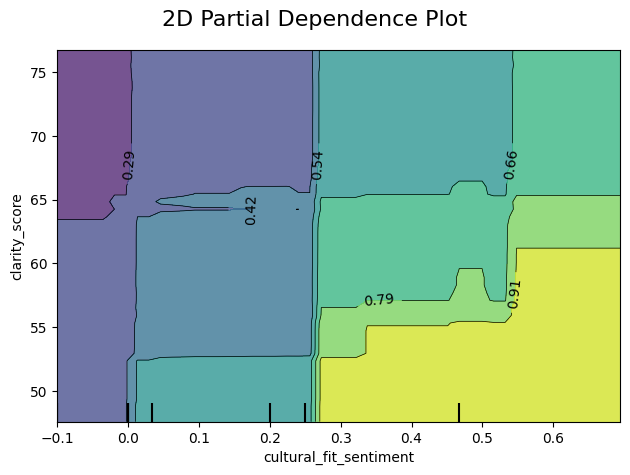

In [47]:
# The top 2 features are cultural_fit_sentiment and clarity_score

features = [('cultural_fit_sentiment', 'clarity_score')]  # 2D feature tuple

print("\n--- 2D Partial Dependence Plot for 'cultural_fit_sentiment' and 'clarity_score' ---")
PartialDependenceDisplay.from_estimator(
    estimator=xgb_best,
    X=X_train,  
    features=features, 
    grid_resolution=50,
    kind='average',
)

# Show the plot
plt.suptitle("2D Partial Dependence Plot", fontsize=16)
plt.tight_layout()
plt.show()

As "cultural_fit_sentiment" increases, there is a gradual increase in the partial dependence value, which suggests a positive relationship between cultural fit sentiment and the target variable.

Similarly, as "clarity_score" increases, the partial dependence value also rises, indicating a positive impact of clarity score on the target variable.

The combined effect of high "cultural_fit_sentiment" and high "clarity_score" results in the highest partial dependence values, suggesting that these two variables together significantly influence the model's predictions.

When clarity_score is low (less than 55), the partial dependence values are higher, ranging from ~0.46 to ~0.51. This suggests that lower clarity_score leads to higher model predictions, regardless of the cultural_fit_sentiment.

As clarity_score increases beyond 60, the partial dependence values decline sharply, ranging from ~0.11 to ~0.36. This decline is more pronounced for higher cultural_fit_sentiment values (greater than 4).